# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/my_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_data = pd.DataFrame({"City": cities})

In [4]:
weather_data['Latitude'] = ""
weather_data['Longitude'] = ""
weather_data['Max Temperature'] = ""
weather_data['Humidity'] = ""
weather_data['Cloudiness'] = ""
weather_data['Wind Speed'] = ""
weather_data['Country'] = ""
weather_data['Date'] = ""

In [5]:
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

city_counter = 1

for index, row in weather_data.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    city = row['City']
    response = requests.get(query_url + city).json()
  
    print(f"Processing Record {city_counter} of Set 1 | {city}")
    city_counter += 1    
    
    try:
        weather_data.loc[index, "Latitude"] = response['coord']['lat']
        weather_data.loc[index, "Longitude"] = response['coord']['lon']
        weather_data.loc[index, "Max Temperature"] = response['main']['temp_max']
        weather_data.loc[index, "Humidity"] = response['main']['humidity']
        weather_data.loc[index, "Cloudiness"] = response['clouds']['all']
        weather_data.loc[index, "Wind Speed"] = response['wind']['speed']
        weather_data.loc[index, "Country"] = response['sys']['country']
        weather_data.loc[index, "Date"] = response['dt']
                
    except (KeyError, IndexError): 
        print("City not found. Skipping....")
        
print(f"-----------------------------")
print(f"Data Retrieval Complete")      
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | jijiga
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | puttur
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | olafsvik
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | forio
Processing Record 9 of Set 1 | keflavik
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | tiarei
Processing Record 13 of Set 1 | gander
Processing Record 14 of Set 1 | ornskoldsvik
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping....
Processing Record 16 of Set 1 | isangel
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | umzimvubu
City not found. Skipping....
Processing Record 19 of Set 1 | santa isabel
Processing Record 20 of Set 1 | raudeberg
Processing Record 21 of Set 1 | sungaipenuh
Processing Record 22 of

Processing Record 188 of Set 1 | baoding
Processing Record 189 of Set 1 | kirakira
Processing Record 190 of Set 1 | souillac
Processing Record 191 of Set 1 | palmares
Processing Record 192 of Set 1 | katima mulilo
Processing Record 193 of Set 1 | hudson bay
Processing Record 194 of Set 1 | horta
Processing Record 195 of Set 1 | matara
Processing Record 196 of Set 1 | kanniyakumari
Processing Record 197 of Set 1 | luderitz
Processing Record 198 of Set 1 | ormara
Processing Record 199 of Set 1 | manaure
Processing Record 200 of Set 1 | guerrero negro
Processing Record 201 of Set 1 | villa vazquez
City not found. Skipping....
Processing Record 202 of Set 1 | pochutla
Processing Record 203 of Set 1 | sitka
Processing Record 204 of Set 1 | fort-shevchenko
Processing Record 205 of Set 1 | krasnaya gora
Processing Record 206 of Set 1 | la ronge
Processing Record 207 of Set 1 | saint-augustin
Processing Record 208 of Set 1 | labrea
Processing Record 209 of Set 1 | shakawe
Processing Record 210

Processing Record 374 of Set 1 | hay river
Processing Record 375 of Set 1 | boksitogorsk
Processing Record 376 of Set 1 | kununurra
Processing Record 377 of Set 1 | jiddah
City not found. Skipping....
Processing Record 378 of Set 1 | mehamn
Processing Record 379 of Set 1 | karkaralinsk
City not found. Skipping....
Processing Record 380 of Set 1 | umm jarr
City not found. Skipping....
Processing Record 381 of Set 1 | arrifes
Processing Record 382 of Set 1 | fort nelson
Processing Record 383 of Set 1 | alofi
Processing Record 384 of Set 1 | adwa
Processing Record 385 of Set 1 | sur
Processing Record 386 of Set 1 | oussouye
Processing Record 387 of Set 1 | shelburne
Processing Record 388 of Set 1 | mabay
Processing Record 389 of Set 1 | danilov
Processing Record 390 of Set 1 | vila velha
Processing Record 391 of Set 1 | mangrul pir
Processing Record 392 of Set 1 | wajid
Processing Record 393 of Set 1 | havoysund
Processing Record 394 of Set 1 | ryotsu
Processing Record 395 of Set 1 | buin

Processing Record 558 of Set 1 | klaksvik
Processing Record 559 of Set 1 | okha
Processing Record 560 of Set 1 | verkhnevilyuysk
Processing Record 561 of Set 1 | umm kaddadah
Processing Record 562 of Set 1 | samalaeulu
City not found. Skipping....
Processing Record 563 of Set 1 | bac lieu
Processing Record 564 of Set 1 | rafsanjan
Processing Record 565 of Set 1 | ardakan
Processing Record 566 of Set 1 | dong xoai
Processing Record 567 of Set 1 | upington
Processing Record 568 of Set 1 | ostrovnoy
Processing Record 569 of Set 1 | ksenyevka
City not found. Skipping....
Processing Record 570 of Set 1 | buraydah
Processing Record 571 of Set 1 | durban
Processing Record 572 of Set 1 | bayburt
Processing Record 573 of Set 1 | cody
Processing Record 574 of Set 1 | sainte-suzanne
Processing Record 575 of Set 1 | bonavista
Processing Record 576 of Set 1 | pergamino
Processing Record 577 of Set 1 | nanakuli
Processing Record 578 of Set 1 | quetzaltepec
City not found. Skipping....
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
compression_opts = dict(method='zip',
                        archive_name='my_cities.csv')  
weather_data.to_csv('my_cities.zip', index=False,
          compression=compression_opts)  

In [7]:
weather_data.count()

City               612
Latitude           612
Longitude          612
Max Temperature    612
Humidity           612
Cloudiness         612
Wind Speed         612
Country            612
Date               612
dtype: int64

In [8]:
weather_data

City Latitude Longitude Max Temperature Humidity Cloudiness  \
0             jijiga     9.35      42.8           63.61       78         89   
1             albany     42.6    -73.97           82.99       62         56   
2             puttur    12.77     75.22            82.4       83         40   
3        port alfred   -33.59     26.89           62.76       84          0   
4           olafsvik    64.89    -23.71            49.8       71         60   
..               ...      ...       ...             ...      ...        ...   
607            nikko    36.75    139.62              73       84        100   
608        ostersund    63.18     14.64            53.6       58         48   
609      grand gaube   -20.01     57.66              64       76          3   
610           loding     67.3     14.75            55.4       71         75   
611  plettenberg bay   -34.05     23.37           59.67       79          0   

    Wind Speed Country        Date  
0        12.57      ET  1595434430  
1         3.83      US  1595433935  
2         0.54      IN  1595434431  
3         2.01      ZA  1595434281  
4         7.96      IS  1595434169  
..         ...     ...         ...  
607       5.01      JP  1595434531  
608      19.46      SE  1595434531  
609          3      MU  1595434531  
610      12.75      NO  1595434531  
611       4.79      ZA  1595434532  

[612 rows x 9 columns]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_data_humidity = weather_data.loc[weather_data["Humidity"] > 100]
weather_data_humidity

Empty DataFrame
Columns: [City, Latitude, Longitude, Max Temperature, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
#already exported above

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
weather_data.head()

City Latitude Longitude Max Temperature Humidity Cloudiness  \
0       jijiga     9.35      42.8           63.61       78         89   
1       albany     42.6    -73.97           82.99       62         56   
2       puttur    12.77     75.22            82.4       83         40   
3  port alfred   -33.59     26.89           62.76       84          0   
4     olafsvik    64.89    -23.71            49.8       71         60   

  Wind Speed Country        Date  
0      12.57      ET  1595434430  
1       3.83      US  1595433935  
2       0.54      IN  1595434431  
3       2.01      ZA  1595434281  
4       7.96      IS  1595434169

In [10]:
weather_data.dtypes

City               object
Latitude           object
Longitude          object
Max Temperature    object
Humidity           object
Cloudiness         object
Wind Speed         object
Country            object
Date               object
dtype: object

In [11]:
weather_data["Latitude"] = pd.to_numeric(weather_data["Latitude"], errors='coerce')
weather_data["Max Temperature"] = pd.to_numeric(weather_data["Max Temperature"], errors='coerce')
weather_data["Humidity"] = pd.to_numeric(weather_data["Humidity"], errors='coerce')
weather_data["Cloudiness"] = pd.to_numeric(weather_data["Cloudiness"], errors='coerce')
weather_data["Wind Speed"] = pd.to_numeric(weather_data["Wind Speed"], errors='coerce')

## Latitude vs. Temperature Plot

In [13]:
scatter_one = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Max Temperature']
t = y_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Max Temperature (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_temperature.png")
plt.show()

In [ ]:
#Observation: the closer you get to the equator, the higher the temperature, with the
#PNG image for each scatter plot.

## Latitude vs. Humidity Plot

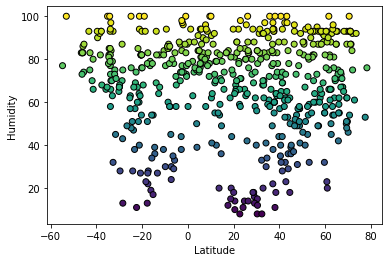

In [14]:
scatter_two = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
t = y_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Humidity (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_humidity.png")
plt.show()

In [ ]:
#Observation
#PNG image for each scatter plot.

## Latitude vs. Cloudiness Plot

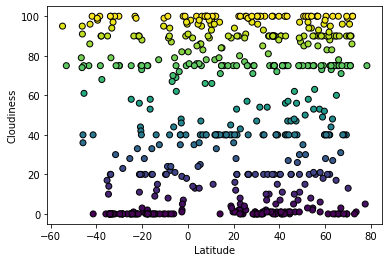

In [15]:
scatter_three = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
t = y_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Cloudiness (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_cloudiness.png")
plt.show()

In [ ]:
#Observation
#PNG image for each scatter plot.

## Latitude vs. Wind Speed Plot

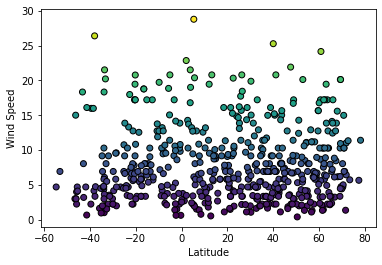

In [16]:
scatter_four = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
t = y_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Wind Speed (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_wind_speed.png")
plt.show()

In [ ]:
#Observation
#PNG image for each scatter plot.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
#Observations
#PNG image for each scatter plot

In [17]:
northern_hemisphere = weather_data.loc[(weather_data["Latitude"] >= 0)]
northern_hemisphere

City  Latitude Longitude  Max Temperature  Humidity  Cloudiness  \
0       jijiga      9.35      42.8            63.61      78.0        89.0   
1       albany     42.60    -73.97            82.99      62.0        56.0   
2       puttur     12.77     75.22            82.40      83.0        40.0   
4     olafsvik     64.89    -23.71            49.80      71.0        60.0   
6      college     64.86    -147.8            51.80      87.0        90.0   
..         ...       ...       ...              ...       ...         ...   
604     urusha     54.05     122.9            62.08      55.0       100.0   
605    yenagoa      4.92      6.26            79.07      84.0        98.0   
607      nikko     36.75    139.62            73.00      84.0       100.0   
608  ostersund     63.18     14.64            53.60      58.0        48.0   
610     loding     67.30     14.75            55.40      71.0        75.0   

     Wind Speed Country        Date  
0         12.57      ET  1595434430  
1          3.83      US  1595433935  
2          0.54      IN  1595434431  
4          7.96      IS  1595434169  
6          2.15      US  1595434207  
..          ...     ...         ...  
604        4.18      RU  1595434530  
605        9.46      NG  1595434530  
607        5.01      JP  1595434531  
608       19.46      SE  1595434531  
610       12.75      NO  1595434531  

[389 rows x 9 columns]

In [18]:
southern_hemisphere = weather_data.loc[(weather_data["Latitude"] < 0)]
southern_hemisphere

City  Latitude Longitude  Max Temperature  Humidity  \
3        port alfred    -33.59     26.89            62.76      84.0   
5            mataura    -46.19    168.86            39.00      83.0   
9             touros     -5.20    -35.46            84.20      58.0   
10    saint-philippe    -21.36     55.77            68.00      64.0   
11            tiarei    -17.53   -149.33            71.60      83.0   
..               ...       ...       ...              ...       ...   
601       itaporanga     -7.30    -38.15            90.91      24.0   
602          cordoba    -31.41    -64.18            57.00      71.0   
606         canutama     -6.53    -64.38            95.97      35.0   
609      grand gaube    -20.01     57.66            64.00      76.0   
611  plettenberg bay    -34.05     23.37            59.67      79.0   

     Cloudiness  Wind Speed Country        Date  
3           0.0        2.01      ZA  1595434281  
5          95.0        3.00      NZ  1595434140  
9          75.0       11.41      BR  1595434207  
10         90.0        6.93      RE  1595433931  
11         75.0        3.36      PF  1595434432  
..          ...         ...     ...         ...  
601         0.0       10.71      BR  1595433967  
602        75.0        3.36      AR  1595434530  
606        70.0        2.13      BR  1595434530  
609         3.0        3.00      MU  1595434531  
611         0.0        4.79      ZA  1595434532  

[173 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

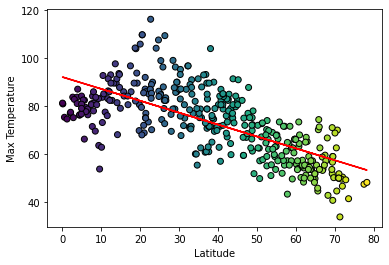

In [19]:
scatter_five = plt.figure()
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Max Temperature: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_temperature.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
scatter_six = plt.figure()
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Max Temperature: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

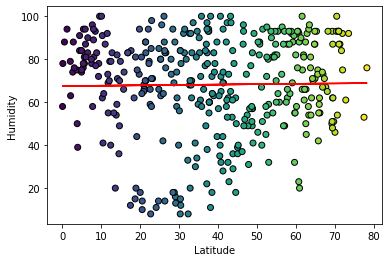

In [21]:
scatter_seven = plt.figure()
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Humidity: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

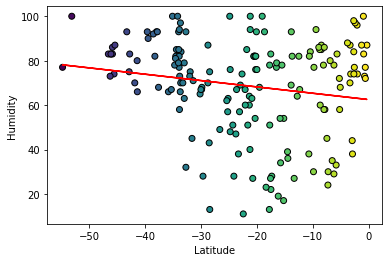

In [22]:
scatter_eight = plt.figure()
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Humidity: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [23]:
scatter_nine = plt.figure()
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Cloudiness: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

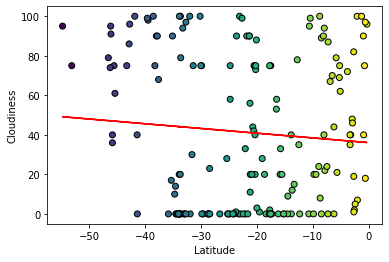

In [24]:
scatter_ten = plt.figure()
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Cloudiness: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

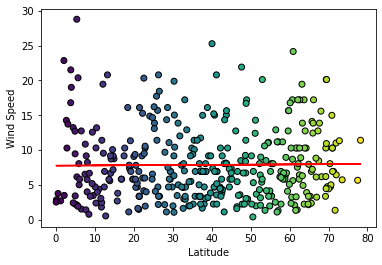

In [25]:
scatter_eleven = plt.figure()
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Wind Speed: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_wind_speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

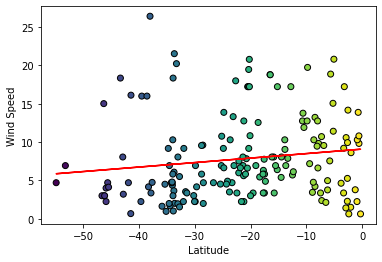

In [26]:
scatter_twelve = plt.figure()
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Wind Speed: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_wind_speed.png")
plt.show()